<a href="https://colab.research.google.com/github/wjddhkszb/opentutorials_git_wjddhkszb/blob/master/word2vec_%ED%8A%B9%ED%97%88%EB%8D%B0%EC%9D%B4%ED%84%B0_%ED%95%9C%EB%82%98%EB%88%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
!pip install pandas
!pip install nltk
!pip install gensim
!pip install matplotlib 

In [ ]:
# 한나눔 형태소분석기
!apt-get update !apt-get install g++ openjdk-8-jdk python-dev python3-dev 
!pip3 install JPype1-py3 
!pip3 install konlpy 
!JAVA_HOME="C:\Program Files\Java\jdk1.8.0_261"



E: The update command takes no arguments
     |████████████████████████████████| 92kB 4.5MB/s 
  Created wheel for JPype1-py3: filename=JPype1_py3-0.5.5.4-cp36-cp36m-linux_x86_64.whl size=2676344 sha256=ac67ac65b3c79777062de27e0b29036cdc3d44f546a19eb44725fe3223347258
  Stored in directory: /root/.cache/pip/wheels/52/37/1f/1015d908d12a0e9b239543d031fda0cded9823aa1306939541
Successfully built JPype1-py3
     |████████████████████████████████| 19.4MB 1.2MB/s 
     |████████████████████████████████| 92kB 11.3MB/s 
     |████████████████████████████████| 460kB 50.5MB/s 
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
GPU = True
if GPU: # GPU
    import cupy as np
    np.cuda.set_allocator(np.cuda.MemoryPool().malloc)
    #np.add.at = np.scatter_add

    print('\033[92m' + '-' * 60 + '\033[0m')
    print(' ' * 23 + '\033[92mGPU Mode (cupy)\033[0m')
    print('\033[92m' + '-' * 60 + '\033[0m\n')
else :
    import numpy as np

------------------------------------------------------------
                       GPU Mode (cupy)
------------------------------------------------------------



In [ ]:
import pandas as pd
from gensim.models import Word2Vec
from konlpy.tag import Hannanum

In [ ]:
hannanum = Hannanum()
# filename = '/content/gdrive/My Drive/특허 데이터/kipris_biblio_info_202010281518.csv'
filename = '/content/gdrive/My Drive/특허 데이터/kipris_test.csv'
df = pd.read_csv(filename, engine='python')

In [ ]:
df = df.dropna(axis=0)

In [ ]:
stop_word_list = []

with open('/content/gdrive/My Drive/word2vec/한글 불용어 리스트.txt') as data:
   lines = data.readlines()
   for i in lines:
     stop_word_list.append(i.rstrip('\n'))

hannanum_list = []

doc_size = len(df)
count = 0

for i in df['astrtcont'].values:
  result = []
  hannanum_tokenizer = hannanum.nouns(i)
  
  for j in hannanum_tokenizer:
    if j not in stop_word_list:
      result.append(j)
  
  hannanum_list.append(result)
  count += 1

  if round((count / doc_size) * 100) == 20:
    print("20% 저장했습니다.")
  elif round((count / doc_size) * 100) == 40:
    print("40% 저장했습니다.")
  elif round((count / doc_size) * 100) == 60:
    print("60% 저장했습니다.")
  elif round((count / doc_size) * 100) == 80:
    print("80% 저장했습니다.")
  elif round((count / doc_size) * 100) == 100:
    print("100% 저장했습니다.")




20% 저장했습니다.
20% 저장했습니다.
20% 저장했습니다.
40% 저장했습니다.
40% 저장했습니다.
40% 저장했습니다.
60% 저장했습니다.
60% 저장했습니다.
60% 저장했습니다.
80% 저장했습니다.
80% 저장했습니다.
80% 저장했습니다.
100% 저장했습니다.
100% 저장했습니다.


In [ ]:
model = Word2Vec(
    hannanum_list,
    size=300,
    window=20,
    min_count=2,
    workers=4,
    sg=1)

model.train(hannanum_list, total_examples=len(hannanum_list), epochs=10)
model.save('/content/gdrive/My Drive/word2vec/word2vec-model/word2vec-hannanum.model')
print("Word2Vec Modeling finished")

Word2Vec Modeling finished


In [ ]:
from gensim.models import Word2Vec

model = Word2Vec.load("/content/gdrive/My Drive/word2vec/word2vec-model/word2vec-hannanum.model")
print(model.wv.most_similar('발명'))

[('방법', 0.7359046936035156), ('중쇄가변영역', 0.6131939888000488), ('완전', 0.6126693487167358), ('이용', 0.6104632019996643), ('세포질', 0.6087356209754944), ('이뮤노글로불린(immunoglobulin)', 0.6013910174369812), ('침투능', 0.5973713397979736), ('약물', 0.5913896560668945), ('항체', 0.5880918502807617), ('융합', 0.5811073780059814)]


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [ ]:
# 참고 https://stackoverflow.com/questions/43776572/visualise-word2vec-generated-from-gensim
from sklearn.manifold import TSNE
from matplotlib import rc, font_manager
import matplotlib as mpl
import matplotlib.pyplot as plt
import gensim 
import gensim.models as g

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

model_name = '/content/gdrive/My Drive/word2vec/word2vec-model/word2vec-hannanum.model'
model = g.Doc2Vec.load(model_name)

vocab = list(model.wv.vocab)
X = model[vocab]

print(len(X))
print(X[0][:10])
tsne = TSNE(n_components=2)

# 100개의 단어에 대해서만 시각화
X_tsne = tsne.fit_transform(X[:100,:])
# X_tsne = tsne.fit_transform(X)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  app.launch_new_instance()


1737
[ 0.05332968  0.01001102  0.02542211 -0.02849809 -0.0131431  -0.00802231
 -0.08034994 -0.07090943  0.07287455 -0.00174052]


In [ ]:
df = pd.DataFrame(X_tsne, index=vocab[:100], columns=['x', 'y'])
df.shape

df.head(10)

,x,y
발명,1.782900,-3.223669
화장도구,-2.261227,0.206807
탄성,0.113935,1.415567
화장료,-1.625719,2.106460
흡수,-1.207981,2.043526
전달,-2.432905,2.820391
본체,-0.162196,3.065342
포함,2.749233,1.061902
상기,2.879860,1.769159
수,2.341835,-3.559944


In [ ]:
import matplotlib.font_manager as fm

path = '/content/gdrive/My Drive/font/NanumBarunGothic.ttf'
fontprop = fm.FontProperties(fname=path, size=10)

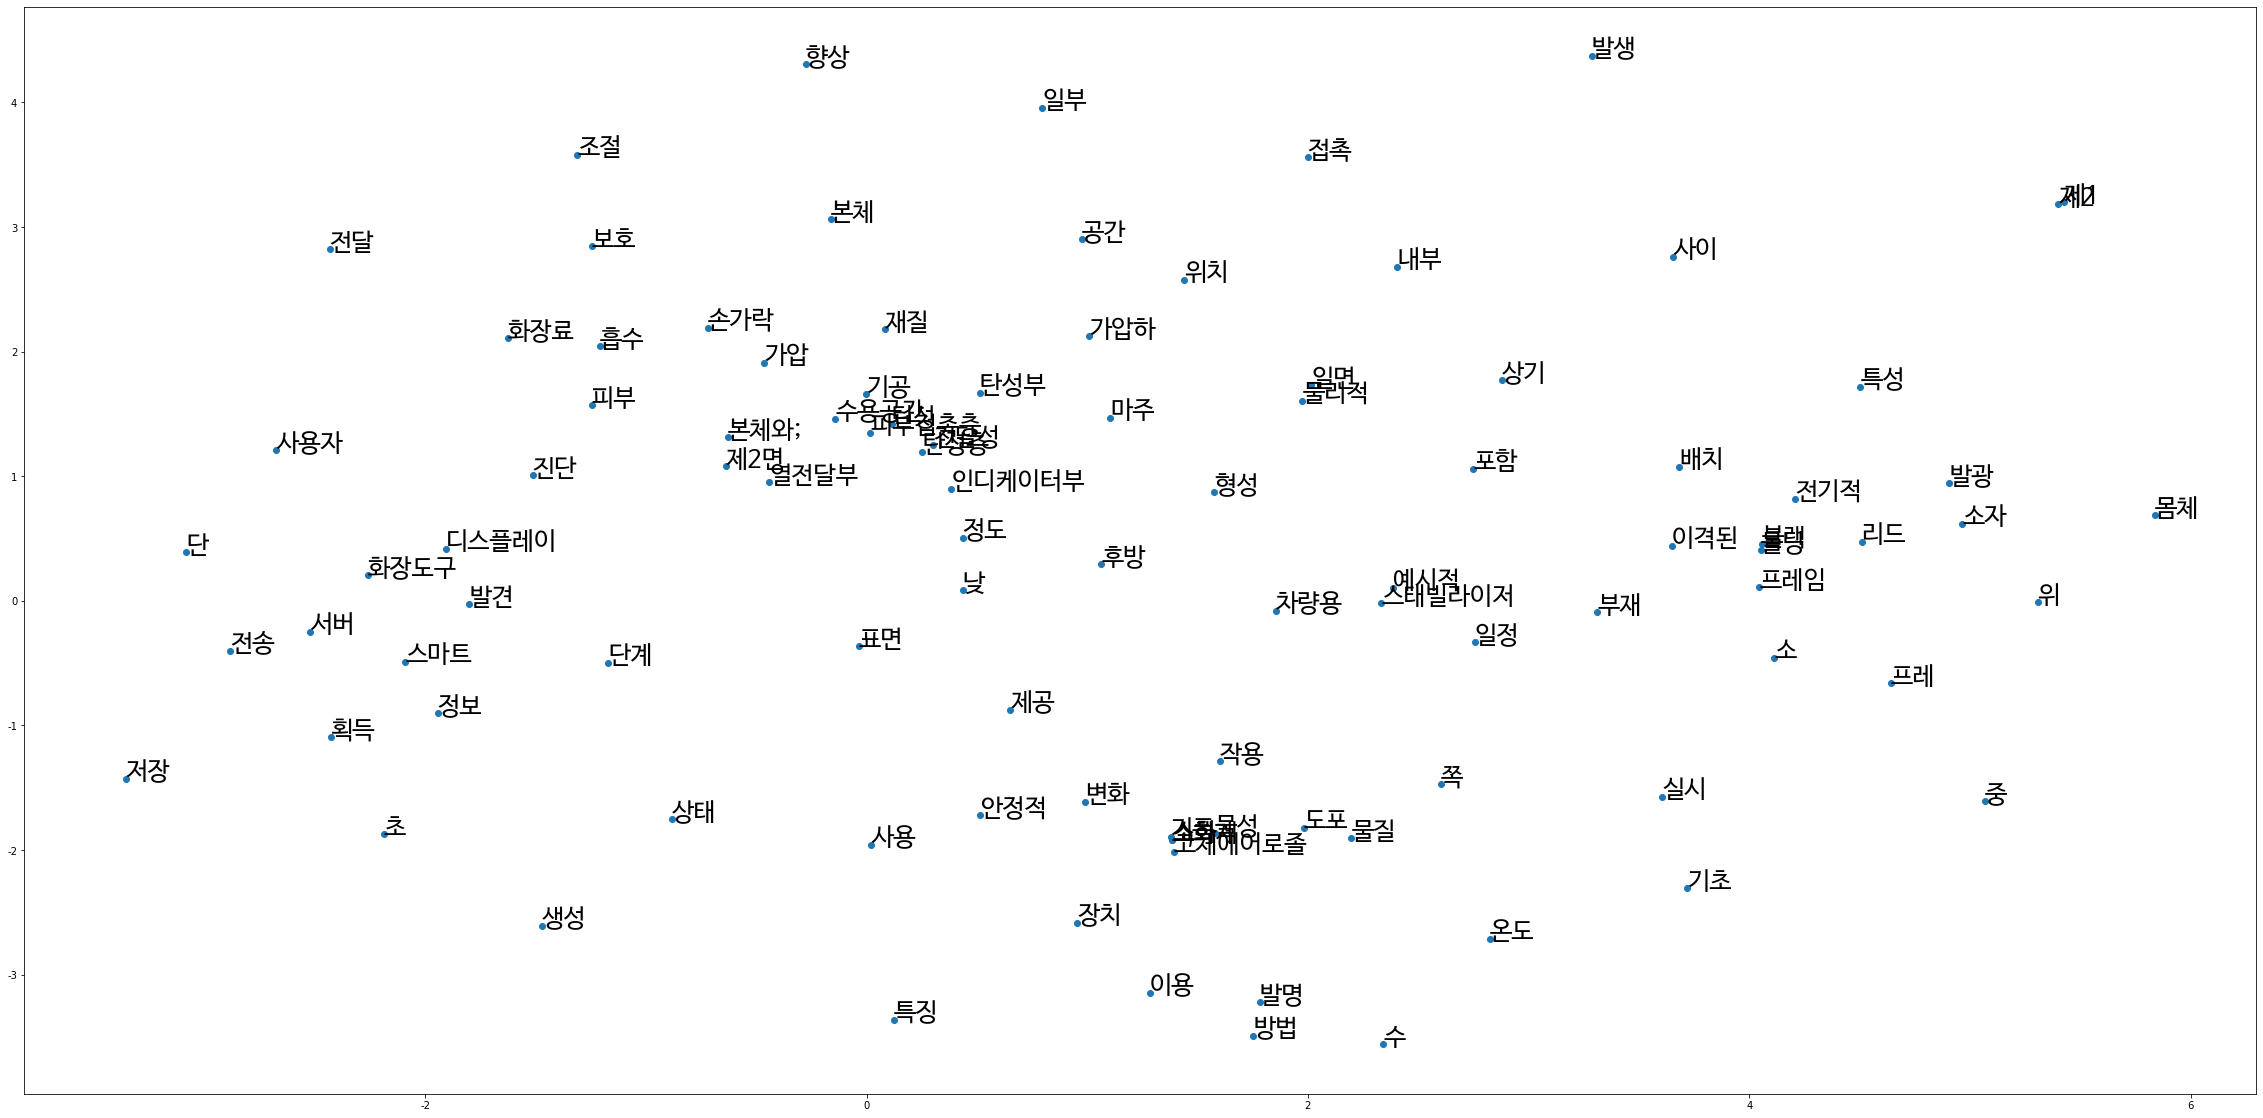

In [ ]:
fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=25, fontproperties = fontprop)
plt.show()

In [ ]:
from gensim.models import Word2Vec
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from konlpy.tag import Hannanum

hannanum = Hannanum()

stop_word_list = []

with open('/content/gdrive/My Drive/word2vec/한글 불용어 리스트.txt') as data:
   lines = data.readlines()
   for i in lines:
     stop_word_list.append(i.rstrip('\n'))

model = Word2Vec.load('/content/gdrive/My Drive/word2vec/word2vec-model/word2vec-hannanum.model')

dimension = 300
sentences = [
      '본 발명은 사용자의 온수 사용 패턴을 보다 정확하게 예측하여 필요한 1일 총 사용열량을 산출하고, 전력추종 방식에서 발생한 열량과 상기 1일 필요 열량을 비교하여 추가로 열량이 필요한 경우에 가장 경제적인 방법으로 추가 열량을 공급하도록 함으로써 에너지 비용을 최소화할 수 있도록 해주는 가정용 연료전지 시스템의 발전량 제어방법을 제공하는데 그 목적이 있다.  상기한 목적을 달성하기 위한 본 발명에 따른 가정용 연료전지 시스템의 발전량 제어방법은, 가정용 연료전지를 전력추종 방식에 의해 1일 발전량을 계산하고, 이 1일 발전량에 따라 부수적으로 발생하는 1일 발생열량(Q1)을 계산하는 단계; 사용자의 주간 온수 사용 패턴을 적산한 통계치를 기초로 1일 사용열량(Q2)을 계산하는 단계; 상기 1일 발생열량(Q1)과 상기 1일 사용열량(Q2)을 기초로 계산된 1일 총 사용열량(Qt)을 비교하는 단계; 상기 비교 결과, 상기 1일 총 사용열량(Qt)이 상기 1일 발생열량(Q1)보다 큰 경우에는, 상기 1일 발전량에 따라 연료전지를 발전시키는 한편 하기 식 (1)에 따라 1일 요구열량(Qd)을 계산하는 단계;  1일 요구열량(Qd) = 1일 총 사용열량(Qt) - 1일 발생열량(Q1) (1)  상기 1일 요구열량(Qd)을 연료전지를 발전시켜 얻는데 소요되는 발전비용(W1)과 상기 1일 요구열량(Qd)을 보조...(이하생략)',
      '본 발명은 점검유도구를 구비한 보일러 화염점검창에 관한 것으로, 보일러(100)의 표면에 내부를 연통시켜 형성하되 좌우에 플랜지(111)를 형성하고 상하부에 개구부(113)를 형성하며 전단의 통로 테두리에 탄성블록(114)을 끼워 탄력 설치하는 점검유도구(110)와; 상기 점검유도구(110)의 플랜지(111)와 개구부(113)에 대응하는 플랜지(121)와 개구부(123)를 형성하고 탄성블록(114)에 마주하는 가압블록(124)을 구비하되 외부에서 내부를 투시하는 메인점검창(126)을 형성한 점검커버(120)와; 상기 점검유도구(110)와 점검커버(120) 사이 상하에 형성한 개구부(113,123)에 결합하여 내부를 밀폐시키는 상하차단구(130)와; 상기 점검유도구(110)와 점검커버(120)의 탄성블록(114)과 가압블록(124) 사이에 압입하여 설치하는 안전점검창(140)과; 상기 점검유도관(110)의 상면에 보일러(100) 내부에 연통하는 진입통로(211)를 형성하되 진입통로(211)에 차단판(213)을 구비한 센서유도관(210)과; 상기 센서유도관(210)에 나사 결합하여 보일러(100)의 내부로 진입하는 센서케이스(220); 및 상기 센서케이스(220)에 탑재시키는 측정센서(230)로 구성하므로; 보일러의 화염점검창을 손쉽고 편리하며 안정적으로 교체 보수할 수 있도록 함과 동시에 화염점검창의...(이하생략)'
]
result_list = []

for sentence in sentences:
  result = []
  words = hannanum.nouns(sentence)

  for word in words:
    if word not in stop_word_list:
      result.append(word)

  result_list.append(result)

for i in result_list:
  print(i)

snippet = result_list[0]
snippet_vector = np.zeros((1, dimension))
for word in snippet:
       if word in model.wv.vocab:
           vecvalue = model[word].reshape(1, dimension)
           snippet_vector = np.add(snippet_vector, vecvalue)

link_text = result_list[1]
link_vector = np.zeros((1, dimension))
for word in link_text:
       if word in model.wv.vocab:
           vecvalue = model[word].reshape(1, dimension)
           link_vector = np.add(link_vector, vecvalue)

print('유사도', cosine_similarity(snippet_vector, link_vector))

['발명', '사용자', '수', '사용', '패턴', '정확', '예측', '필요', '1일', '사용열량', '산출', '전력추종', '방식', '발생', '열량', '상기', '1일', '필요', '열량', '비교', '추가', '열량', '필요', '경우', '경제적', '방법', '추', '열량', '공급', '에너지', '비용', '최소', '수', '가정용', '연료전지', '시스템', '발전량', '제어방법', '제공', '목적', '상기', '목적', '달성', '발명', '가정용', '연료전지', '시스템', '발전량', '제어방법', '가정용', '연료전지', '전력추종', '방식', '1', '발전량', '계산', '1일', '발전량', '부수적', '발생', '1', '발생열량(Q1)', '계산', '단계;', '사용자', '주간', '수', '사용', '패턴', '적산한', '통계치', '기초', '1', '사용열량(Q2)', '계산', '단계;', '상기', '1', '발생열량(Q1)', '상기', '1', '사용열량(Q2)', '기초', '계산', '1일', '사용열량(Qt)', '비교', '단계;', '상기', '비교', '결과', '상기', '1일', '사용열량(Qt)', '상기', '1일', '발생열량(Q1)', '경우', '상기', '1일', '발전량', '연료전지', '발전', '한편', '식', '1', '1', '요구열량(Qd)', '계산', '단계;', '1일', '요구열량(Qd)', '1일', '사용열량(Qt)', '1일', '발생열량(Q1)', '1', '상기', '1', '요구열량(Qd)', '연료전지', '발전', '소요', '발전비용(W1)', '상기', '1', '요구열량(Qd)', '보조', '이하생략']
['발명', '점검유도구', '구비한', '보일러', '화염점검창', '보일러(100)', '표면', '내부', '연통', '형성', '좌우', '플랜지(111)', '형성', '상하부', '개구부(11

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:48: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
